<a href="https://colab.research.google.com/github/eTcilopp/geek_brains/blob/main/044_machine_learning/hw11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа № 11

Тебе предстоит разработать модель машинного обучения для предсказания вероятности оттока клиентов в телекоммуникационной компании. У тебя есть набор данных, который содержит различные признаки о клиентах, такие как возраст, пол, тип подключения, длительность пользования услугами и т.д.

Твоя задача состоит в следующем:

1. Загрузить данные и провести предварительный анализ данных.

2. Подготовить данные для обучения модели. Это может включать удаление ненужных признаков, заполнение пропущенных значений и нормализацию данных.

3. Разделить данные на обучающую и тестовую выборки.

4. Выбрать модель машинного обучения, которую ты хочешь использовать для предсказания оттока клиентов. Например, можно использовать модель классификации, такую как логистическая регрессия или случайный лес.

5. Обучить модель на обучающей выборке и оценить ее производительность на тестовой выборке.

6. Провести анализ результатов и оценить важность различных признаков для предсказания оттока клиентов.

7. При необходимости, провести дополнительные эксперименты, чтобы улучшить производительность модели. Это может включать изменение параметров модели, добавление новых признаков или использование другой модели машинного обучения.

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import svm
import statistics

In [2]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

In [3]:
for file in os.listdir(path):
    if file.endswith(".csv"):  # Adjust if the dataset has another format
        csv_file = os.path.join(path, file)
        break
df = pd.read_csv(csv_file)

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# EDA

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isna().sum()/df.shape[0]

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


Отсустствующих значений нет!

In [9]:
df.Churn.value_counts()/df.shape[0]

,count
Churn,
No,0.73463
Yes,0.26537


Наблюдаем некоторый дисбаланс классов

Проверим численные данные на выбросы

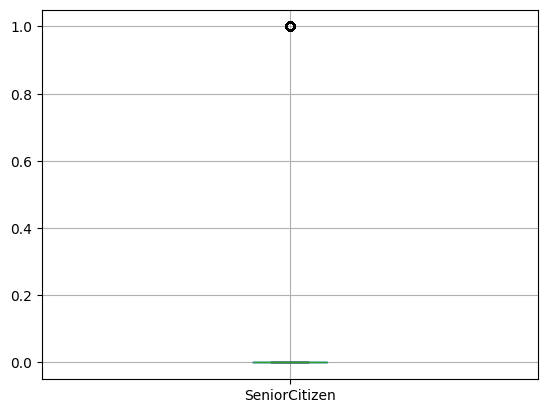

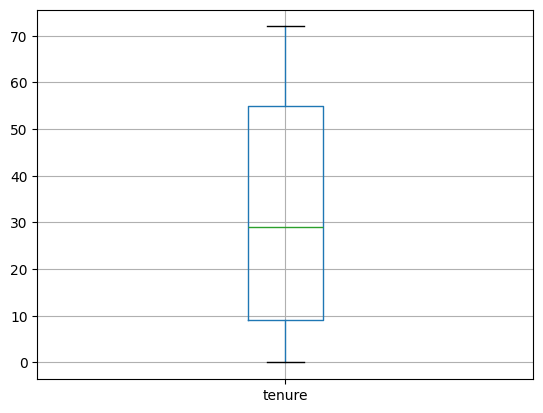

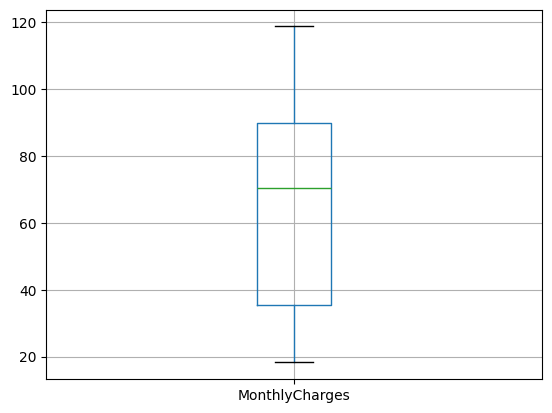

In [10]:
for col in df.select_dtypes(include=['number']).columns:
  boxplot = df.boxplot(column=col)
  plt.show()


Непонятен результат SeniorSitizen - посмотрим подробнее

In [11]:
df.SeniorCitizen.value_counts()

,count
SeniorCitizen,
0,5901
1,1142


Понятно. Это - категориальный параметр - с некоторым дисбалансом.<br>
Остальные данные выглядят нормально (в смылсле выбросов)

Избавимся от customerID  - по-моему, никакой полезной информации ID в этом кейсе не несет

In [12]:
df = df.drop(columns=['customerID'])

In [13]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Конвертируем категориальные данные в числовые - воспользуемся One-Hot encoding

In [14]:
categorical_cols = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df = pd.get_dummies(df, columns=categorical_cols)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,Female,0,Yes,No,1,No,Yes,29.85,29.85,No,...,False,True,False,False,True,False,False,True,False,False
1,Male,0,No,No,34,Yes,No,56.95,1889.5,No,...,True,True,False,False,True,False,False,True,False,False
2,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes,...,False,True,False,False,True,False,False,True,False,False


Преобразуем Yes/No columns в цифровые значения

In [15]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for column in yes_no_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,Female,0,1,0,1,0,1,29.85,29.85,0,...,False,True,False,False,True,False,False,True,False,False
1,Male,0,0,0,34,1,0,56.95,1889.5,0,...,True,True,False,False,True,False,False,True,False,False
2,Male,0,0,0,2,1,1,53.85,108.15,1,...,False,True,False,False,True,False,False,True,False,False


In [16]:
df.gender = df.gender.map({'Male': 1, 'Female': 0})

In [17]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

Посмотрим на корреляцию

In [18]:
corr_df = df.corr()

In [19]:
corr_churn = corr_df.Churn.sort_values(ascending=False)

In [20]:
corr_churn.head()

,Churn
Churn,1.000000
Contract_Month-to-month,0.405103
OnlineSecurity_No,0.342637
TechSupport_No,0.337281
InternetService_Fiber optic,0.308020


Наибольшуу корреляцию наблюдаем с держателями краткосрочных контрактов,<br>
но она не значитальна <br>
Проверим результат на NA значения

In [21]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
PaperlessBilling,0
MonthlyCharges,0
TotalCharges,11
Churn,0


In [22]:
df = df.dropna()

Отделим признаки от Target-значения

In [23]:
X = df.drop(columns=['Churn'])
y = df['Churn']

Попробуем разные модели, чтобы отобрать лучшую

In [24]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
clf_scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
print(clf_scores)

[0.7048051  0.69935897 0.66844374 0.70616331 0.70899274]


In [25]:
lm = LogisticRegression(max_iter=5000)
lm_scores = cross_val_score(lm, X, y, cv=5, scoring='f1_macro')
print(lm_scores)

[0.73362871 0.74946581 0.71657035 0.74435789 0.73195376]


In [26]:
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='f1_macro')
print(rf_scores)

[0.71260885 0.71122843 0.67996765 0.71170924 0.72445467]


In [27]:
clf_score = statistics.mean([0.73869818, 0.74581741, 0.71076651, 0.73263107, 0.71931344])
lm_score = statistics.mean([0.7356674,  0.75124143, 0.71197078, 0.7408483,  0.73175142])
rf_score = statistics.mean([0.6960442,  0.70746048, 0.67275065, 0.69398708, 0.71004095])
print(f'{clf_score = }')
print(f'{lm_score = }')
print(f'{rf_score = }')

clf_score = 0.729445322
lm_score = 0.734295866
rf_score = 0.696056672


Выберем модель логистической регрессии, т.к. она показала лучшие результаты на кросс-валидации

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
lm = LogisticRegression(max_iter=5000)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [30]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Результаты посредственные.<br>
Оценим значимость коэффициентов модели

In [32]:
coefficients = lm.coef_[0]  # Для бинарной классификации это массив коэффициентов
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Absolute Importance': np.abs(coefficients)
}).sort_values(by='Absolute Importance', ascending=False)

# Вывод наиболее важных признаков
print(feature_importance)

                                    Feature  Coefficient  Absolute Importance
13              InternetService_Fiber optic     0.759406             0.759406
15                  Contract_Month-to-month     0.715907             0.715907
17                        Contract_Two year    -0.609731             0.609731
12                      InternetService_DSL    -0.531283             0.531283
39                      StreamingMovies_Yes     0.339003             0.339003
36                          StreamingTV_Yes     0.329592             0.329592
22                        OnlineSecurity_No     0.288706             0.288706
6                          PaperlessBilling     0.275756             0.275756
31                           TechSupport_No     0.275537             0.275537
20           PaymentMethod_Electronic check     0.261271             0.261271
1                             SeniorCitizen     0.261090             0.261090
3                                Dependents    -0.212919        

Самыми значимыми параметрами являются InternetService_Fiber optic  и Contract_Month-to-month

# Выводы:
для уменьшения показателя оттока клиентов компании рекомендуется разработамть программу лояльности для держателей краткосрочных контрактов, подключенных к интернету через оптоволокно. Достоверность такого предположения составляет около 62% что вполне достаточно для принятия решений.